# Predicting Heart Disease Using Machine Learning
This notebook is project on using machine learning and data science concepts to predict heart disease. This is an example of a **classification** problem.

## What is classification?
Classification involves deciding whether a sample is part of one group or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification.

## What is the end goal?
The end goal is to become comfortable with developing and using a machine learning modelling framework.

I will go over the following topics:
* **Exploratory data analysis** - go thorugh the dataset and find out more information about it.
* **Model training** - create models to predict the target variable based on other variables.
* **Model evaluation** - evaluate a model's performance using specific metrics.
* **Model comparison** - compare multiple models to find the best one.
* **Model fine tuning** - adjust the model hyperparameters to improve a model.
* **Feature importance** - how to account for variables that are important for correct predictions.
* **Cross-validation** - how to decide if the trained model will work well on unseen data.
* **Reporting the results** - how to convey and present the findings.

## 1. Problem definition
This project explores a **binary classification** problem, that is a sample can be one of two possible categories.

Problem statement is
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
Data is originally from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) UCI Machine Learning Repository.

However, the data used in this project is the formatted version from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original dataset contains 76 different features, but here only 14 features will be used. This is what will be used to predict the **target** variable.

## 3. Evaluation
The evaluation metric is something to define at the beginning of a project to decide what constitutes as "success", since machine learning is very experimental.
In this project, the goal is to get 95% accuracy.
However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features
Features are the parts of data that are used to make predictions. The best way to find out more about the data is to make a **data dictionary**.

### Heart Disease Data Dictionary
The following data is used to make predictions in this project.
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note**: No personal identifiable information can be found in the dataset.

## Preparing tools
It is important to have a cell that imports all the tools used in the project at the beginning. While in practice the importing of tools occurs in different cells during planning and experimentation, it is important to clean up the code at the end of the project.

In [2]:
# Data analysis and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots in this notebook
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluating models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data
Most of the time data used will be in a `.csv` format. We can import that as a pandas dataframe to use in models.

In [3]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration
Data exploration is important in figuring out what type of model to use to predict hte target variable, and also in understanding whether the model has been fitted properly or if there is **overfitting** or **underfitting**.

In [4]:
# Check the top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Check the bottom 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Another good practice is to check for missing values. In a Pandas dataframe, missing values will usually be designed by NaN (not a number). We can use `.isna` to see if there are any values missing.

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset has no missing values.

`value_counts()` allows us to see how many times each of the values of a categorial column appear.

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

This shows that our data is **balanced**. When there are significantly more samples of one class, that would be considered **unbalanced** data. Ideally, all classes would have the same number of samples.

In [9]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

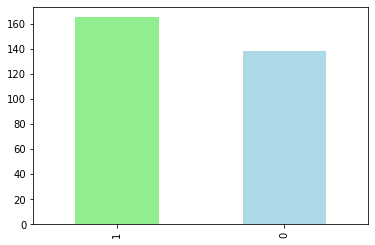

In [10]:
# Plot the value counts to make it more visual
df.target.value_counts().plot(kind='bar', color=['lightgreen', 'lightblue']);

`df.info()` is also a good way to get information on the contents of the dataset and number of non-null values and the datatypes of each of the columns. This is important in case we need to change non-numerical values into numerical ones.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


`df.describe()` gives a range of metrics of each column.

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to gender
If we need to compare two column two each other, we can use the function `pd.crosstab(col_1, col_2)`
From the data dictionary, 
* 0 = no heart disease
* 1 = heart disease
* 0 = female
* 1 = male

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females in the study.

In [14]:
# Create a crosstab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


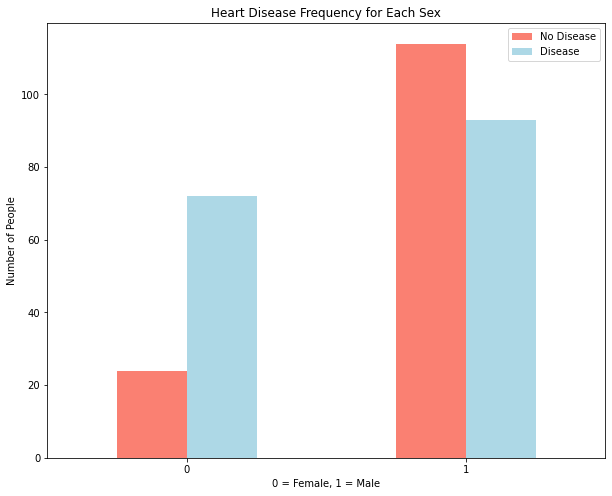

In [20]:
# Make the crosstab more visual
pd.crosstab(df.sex, df.target).plot(kind='bar',
                                   figsize=(10,8),
                                   color=['salmon', 'lightblue']);

# Add title, legend, etc.
plt.title("Heart Disease Frequency for Each Sex")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Number of People")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

This graph shows that in this study, about 75% of female patients had heart disease, and about half of the male participants had the disease.

### Age vs Max Heart Rate
We can make a scatter plot of age and heart rate to see if there is any correlation with the occurance of heart disease.

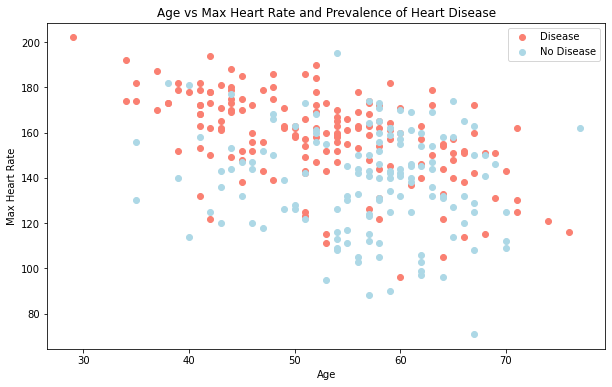

In [16]:
# Create another figure
plt.figure(figsize=(10,6))

# Plot the positive results
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Plot the negative results on the same plot
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

# Add information
plt.title("Age vs Max Heart Rate and Prevalence of Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease', 'No Disease']);

This graph shows that the younger someone is, the higher their heart rate is.

Let's check the age distribution.

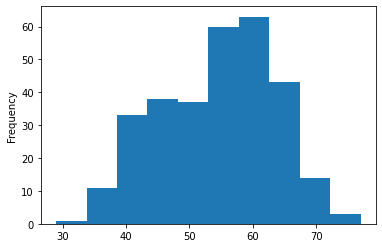

In [17]:
# Histograms are a good way to check the distribution of a variable
df.age.plot.hist()

From the histogram it looks like the age distribution is similar to a normal distribution.

### Heart Disease Frequency per Chest Pain Type

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


We can plot the data to make it more visual.

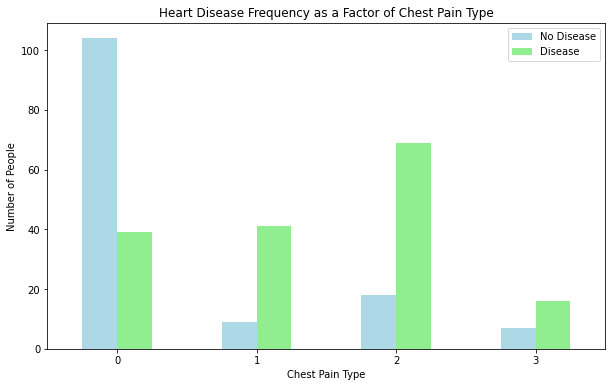

In [22]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize=(10,6),
                                   color=["lightblue", "lightgreen"])

# Add attributes
plt.title("Heart Disease Frequency as a Factor of Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of People")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Correlation between independent variables
Comparing all independent variables gives an idea of which variables may be important or have a significant effect on our target variable.

To do this we can make a correlation matrix using `df.corr()`, whihc is a big table of numbers that tell us how correlated each variable is to the other.

In [23]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


We can make it more visual using Seaborn's heatmap.

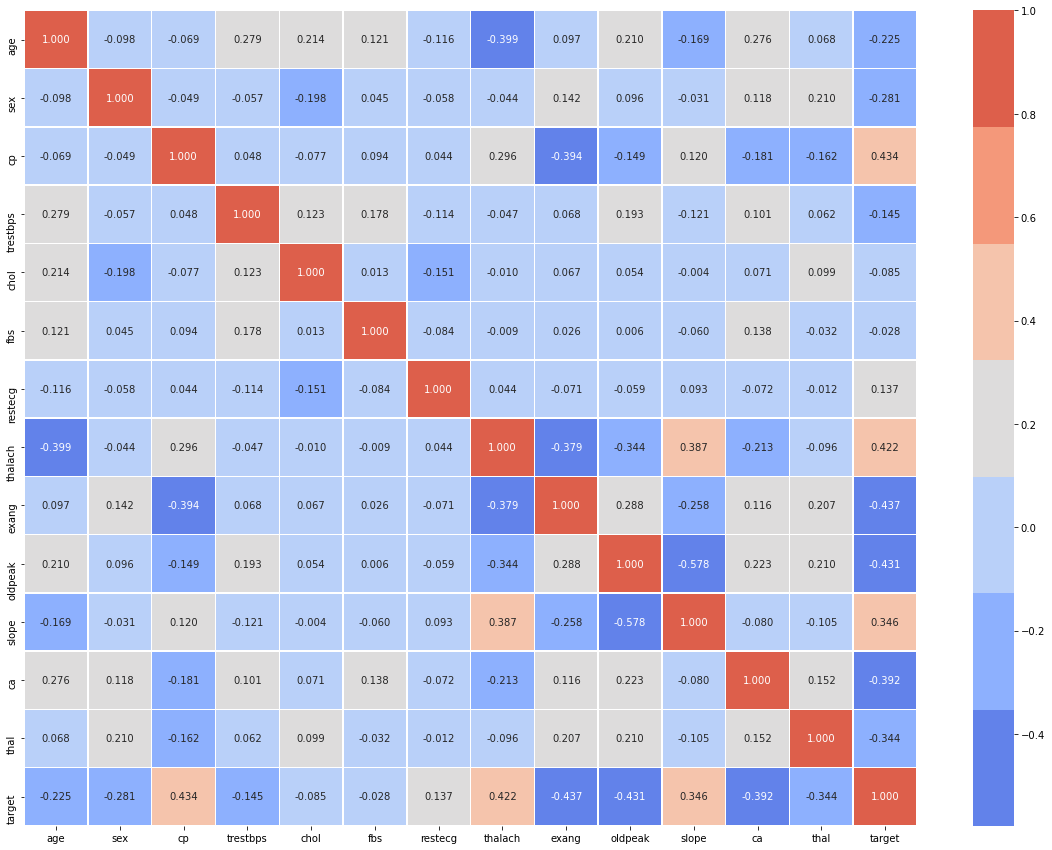

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,
            annot=True,
           linewidth=0.5,
           fmt='.3f',
           cmap=sns.color_palette("coolwarm", 7));

A higher positive value means a positive correlation, and a more negative value means the variables are likely inversely correlated.

## 5. Modelling
We've seen the data, now we can use machine learning to try to predict the target variable based on the 13 independent variables. Our goal is to reach 95% accuracy.

### Split the data into features and labels
**Features** are the independent variables that we use to predict our target.

**Labels** are the labels of the target variable (just the target column).

In [33]:
X = df.drop("target", axis=1)
y = df["target"]

In [34]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Split data into training and testing sets
When we train machine learning model, we need a **training** set and a **testing** set. The test set must remain separate from the training set to get an accurate idea of how well the machine learning model works.

In [36]:
# Set random seed for reproducibility
np.random.seed(42)

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The `test_size` parameter tells the function how much of the data should be put in the testing set. The rule of thumb is to have 80% of the data in the training set and 20% in the testing set.

In [38]:
len(X_train), len(X_test)

(242, 61)

We have 242 samples to train the model on, and 61 sample to test our machine learning model on.

### Model choices
We are going to be using three different machine learning models:
1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighborsClassifier()`
3. Random Forest - `RandomForest()`

In [42]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

def fit_score_model(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the machine learning models.
        models: a dictionary of models from Scikit-Learn
        X_train: training data
        X_test: testing data
        y_train: training labels
        y_test: testing labels
    """
    # Random seed for reproducibility   
    np.random.seed(42)

    # Dictionary to store the scores of the models
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [43]:
model_scores = fit_score_model(models, X_train, X_test, y_train, y_test)

model_scores

C:\Users\dilya\Desktop\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## 6. Model Comparison

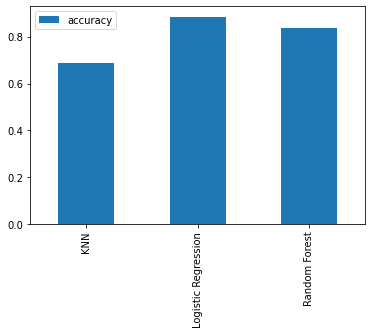

In [45]:
models = pd.DataFrame(model_scores, index=["accuracy"])

models.T.plot.bar();

### Hyperparameter Tuning
Now that we have the models, we need to see if we can adjust any of the hyperparameters of the models to get better results. This can helps us see if our model is **underfitting** or **overfitting**.

#### K-Nearest Neighbors
One main hyperparameter we can tune for this model is the number of neighbors. The default value is 5.

In [46]:
# Create a list of training scores
train_scores = []

# Create a list of test scores
test_scores = []

# Set up algorithm
knn = KNeighborsClassifier()

# Loop through
for i in range(1, 21):
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [49]:
neighbors = range(1, 21)
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

We can plot the scores to get a visual.

Maximum score on the test data is 75.41%


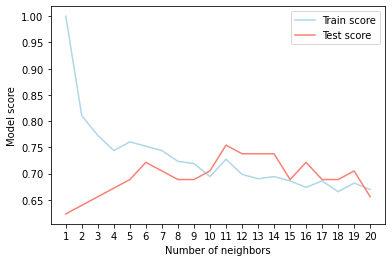

In [51]:
plt.plot(neighbors, train_scores, label="Train score", color="lightblue")
plt.plot(neighbors, test_scores, label="Test score", color="salmon")

plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum score on the test data is {max(test_scores) * 100:.2f}%")

From the graph, it looks like 11 neighbors is the best option.

#### Tuning hyperparameters with `RandomizedSearchCV`

In [54]:
# Different LogisticRegression hyperparameters to try
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [55]:
# Set up random seed
np.random.seed(42)

# Set up random hyperparameter serach for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [56]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [57]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we can do the same thing for RandomForestClassifier.

In [58]:
# Set up random seed
np.random.seed(42)

# Set up randomized search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit the model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


In [59]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [60]:
# Evaluate the RS random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

Both model improved slightly, but not a lot. We can tune it more using `GridSearchCV`

#### Tuning a model using `GridSearchCV`

`GridSearchCV` tries all of the hyperparamters to find the best one.

In [61]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [62]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [63]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In this case, the score stayed the same because the possible number of combinations was 20.

### Other metrics to use to evaluate a model
* ROC Curve
* COnfusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [64]:
# Make predictions on the test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

#### ROC Curve
Area under the ROC curve tells us how accurate our model is, 1 being 100%.

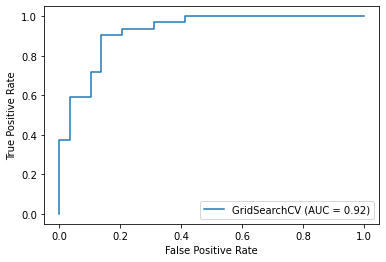

In [66]:
# Plot ROC Curve
plot_roc_curve(gs_log_reg, X_test, y_test);

#### Confusion matrix
A confusion matrix is a good way to show where the model was correct and where the model got it wrong.

In [67]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


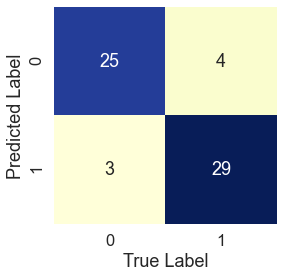

In [70]:
# Make it more visual
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots the confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     cmap="YlGnBu")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)
    

This shows where the model was "getting confused". We had three cases there the person didn't have the disease but the model predicted them to have it (false positive), and four cases where the person did have the disease, but were predicted to not have it (false negative).

This is important to look at to determine which we want to reduce. If false negatives are worse than false positives, it might be best to tune the model to decrease the false negative rate. 

We can look at a classification report to get a more detailed overview of how the model is performing.

#### Classification Report

In [71]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* **Precision** - the proportion of positive identifications that were actually correct (a model with no false positives will get a score of 1.0)
* **Recall** - the proportion of true positives that were predicted correctly (a model with no false negatives would gete a score of 1.0)
* **F1 score** - a combination of precision and recall
* **Support** - the number of samples each metric was calculated on
* **Accuracy** - the accuracy of the model
* **Macro avg** - average precision, recall and F1 score between classes. Doesn't account for the imbalance in data between classes.
* **Weighted avg** - similar to macro avg but considers class imbalances, i.e. gives a bigger weight to a class with more samples.

### Feature Importance
We need to find out which features are more important in determining if a patient has heart disease or not.

In [73]:
# Check which hyperparameters work best
# We're using LogisticRegression
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [75]:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [77]:
clf.fit(X_train, y_train);

In [78]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [79]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

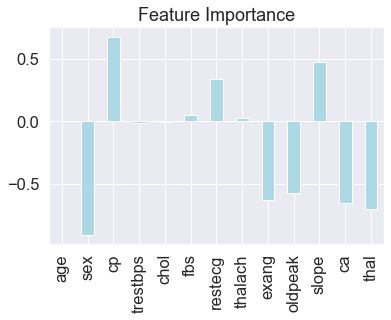

In [81]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", color="lightblue", legend=False);

We can see that some features have a bigger correlation with the target value. This lets us decide if we can save on computing power by eliminating features that don't matter, and focusing on collecting more data on features that do contribute a lot to the diagnosis.